### WK5 Exercise sheet

Intermediate Programming with Data

### Today we explore the brain-body weight relationship and its connection to human evolution.

In this lab, we explore a dataset of brain body weights for a range of animals including both adult and newborn humans. As humans, we tend to think of ourselves as special because of our large brains. Let's see how our brain really compares with that of other species.  Begin by reading the data in *brain_body.csv* into a pandas dataframe found on Canvas. Convert body weight from grams to kilograms.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import scipy.stats as stats

In [2]:
brain_body = pd.read_csv('brain_body.csv') 
print(brain_body.head())
print(brain_body.tail())
print(brain_body.sample(5))

               Species  body_gm  brain_gm
0        Newborn_Human     3200     375.0
1          Adult_Human    73000    1350.0
2  Pithecanthropus_Man    70000     925.0
3             Squirrel      800       7.6
4              Hamster      150       1.4
         Species   body_gm  brain_gm
22       Giraffe    950000     532.0
23  Green_Lizard       200       0.1
24   Sperm_Whale  35000000    7800.0
25        Turtle      3000       0.3
26     Alligator    270000       8.4
                 Species  body_gm  brain_gm
20                 Horse   450000     502.5
10  Bottle-Nosed_Dolphin   400000    1500.0
21                   Cow   700000     441.5
22               Giraffe   950000     532.0
9                    Rat      400       2.0


In [3]:
brain_body['body_gm'] = brain_body['body_gm'].apply(lambda x: x * 0.001)
brain_body = brain_body.rename(columns = {'body_gm' : 'body_kg'})
brain_body

,Species,body_kg,brain_gm
0,Newborn_Human,3.20,375.0
1,Adult_Human,73.00,1350.0
2,Pithecanthropus_Man,70.00,925.0
3,Squirrel,0.80,7.6
4,Hamster,0.15,1.4
5,Chimpanzee,50.00,420.0
6,Rabbit,1.40,11.5
7,Dog_(Beagle),10.00,72.0
8,Cat,4.50,30.0
9,Rat,0.40,2.0


Quoted excerpts from the writings of [Stephen Jay Gould](https://en.wikipedia.org/wiki/Stephen_Jay_Gould) from his book *Ever Since Darwin*, 1979 (Norton).

> To accommodate such a large brain, we have bulbous, balloon-shaped heads unlike those of any other large mammal.  Can we measure superiority by the size of our brains? Elephants and whales have larger brains than ours. But this fact does not confer superior mental ability upon the largest mammals. Larger bodies need larger brains to coordinate their actions. We must find a way to remove the confusing influence of body size from our calculation. 

Create a bar chart of brain size vs. species.  Which species in our dataset has a larger brain than humans? *For each plot you generate in this lab, create a markdown cell summarizing your observations and conclusions.*

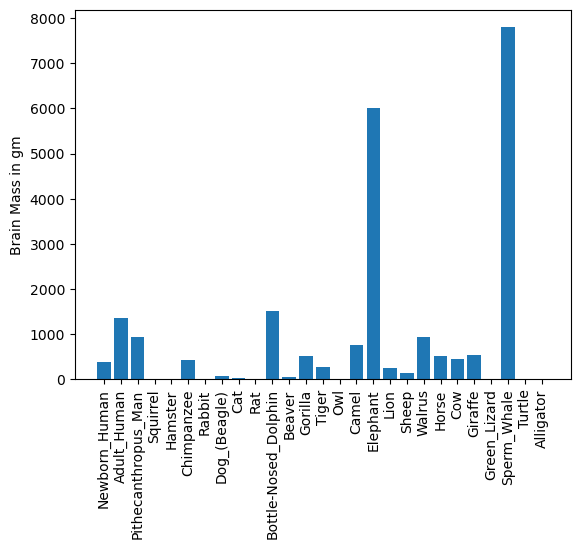

In [4]:
plt.bar(brain_body['Species'], brain_body['brain_gm'])
plt.xticks(rotation=90)
plt.ylabel("Brain Mass in gm")
plt.show()

 In this bar plot Dolphins, Elephants, and Sperm Whales have larger Brain Masses than Adult Humans. This makes sense since these animals are much larger than humans and also they are often considered some of the smartest animals in nature.

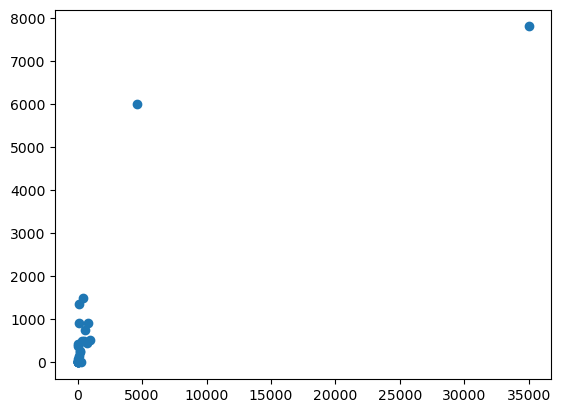

In [5]:
plt.scatter(brain_body['body_kg'], brain_body['brain_gm'])

This scatter plot of the data suggests that there is an extreme range of values and that we need to find someway to normalize the data and make it more readable

Convert the brain and body weights to $log_{10}(brain)$ and $log_{10}(body)$ using the *log10* function from the *math* package.  Then do a best-fit linear regression on *those* values following the recipe provided earlier. Label each point with the species name.

In [6]:
brain_body['brain_gm'] = brain_body['brain_gm'].apply(lambda x : math.log10(x))


brain_body

,Species,body_kg,brain_gm
0,Newborn_Human,3.20,2.574031
1,Adult_Human,73.00,3.130334
2,Pithecanthropus_Man,70.00,2.966142
3,Squirrel,0.80,0.880814
4,Hamster,0.15,0.146128
5,Chimpanzee,50.00,2.623249
6,Rabbit,1.40,1.060698
7,Dog_(Beagle),10.00,1.857332
8,Cat,4.50,1.477121
9,Rat,0.40,0.301030


In [7]:
brain_body['body_kg'] = brain_body['body_kg'].apply(lambda x : math.log10(x))

brain_body

,Species,body_kg,brain_gm
0,Newborn_Human,0.505150,2.574031
1,Adult_Human,1.863323,3.130334
2,Pithecanthropus_Man,1.845098,2.966142
3,Squirrel,-0.096910,0.880814
4,Hamster,-0.823909,0.146128
5,Chimpanzee,1.698970,2.623249
6,Rabbit,0.146128,1.060698
7,Dog_(Beagle),1.000000,1.857332
8,Cat,0.653213,1.477121
9,Rat,-0.397940,0.301030


In [8]:
from scipy.stats import linregress

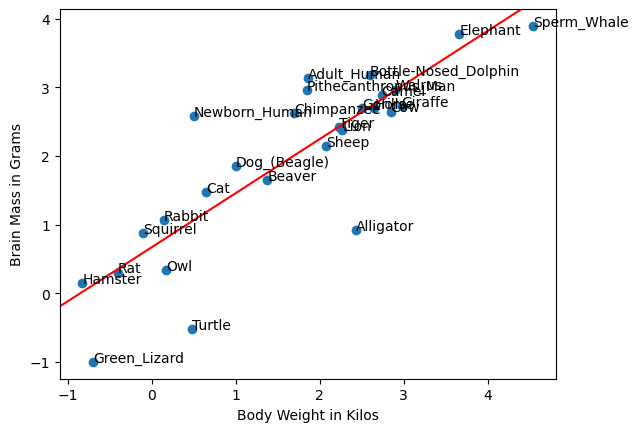

In [9]:
m, b, r, p, std = linregress(brain_body['body_kg'], brain_body['brain_gm'])
plt.scatter(brain_body['body_kg'], brain_body['brain_gm'])
plt.xlabel('Body Weight in Kilos')
plt.ylabel("Brain Mass in Grams")

for i,txt in enumerate(brain_body['Species']):
    plt.annotate(txt, xy = (brain_body['body_kg'][i], brain_body['brain_gm'][i]))

plt.axline(xy1=(0, b), slope=m, color = "red")

By applying log10 to both the species and brain mass we normalize the weight and reduce the impact of outliers and an extreme spectrum of values. Furthermore the linear regression line suggests that there is a positive correlation between body weight and brain mass, meaning most likely when the body weight increases so will the brain mass.

Stephen Jay Gould continues:

> A plot of brain weight vs. body weight for adult mammals points the way out of our paradox. The correct criterion is neither absolute nor relative brain size -- it is the difference between actual brain size and expected brain size at that body weight. To judge the size of our brain, we must compare it with the expected brain size for an average mammal of our body weight.  On this criterion we are, as we had every right to expect, the brainiest mammal by far. No other species lies as far above the expected brain size for average mammals as we do. 

For each species compute (Actual - Predicted) brain weight.  This difference is known as *encephalization*. Plot the encephalization values for each species as a bar chart.

In [10]:
#Use the linear regression line to find the predicted brain weights
def Predicted_Values (df,name, body, brain, slope, y):
    bbCopy =  brain_body
    predicted = []
    for i in range(len(bbCopy[body])):
        predicted.append((slope * bbCopy[body][i]) +y)
        bbCopy[brain][i] = bbCopy[brain][i] - predicted[i]
    plt.bar(bbCopy[name], bbCopy[brain])
    plt.xticks(rotation = 90)
    return bbCopy

/var/folders/bb/hsp4zv4n1j90qvy7v635c_m40000gn/T/ipykernel_90071/1513893904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbCopy[brain][i] = bbCopy[brain][i] - predicted[i]


,Species,body_kg,brain_gm
0,Newborn_Human,0.505150,1.508013
1,Adult_Human,1.863323,0.994760
2,Pithecanthropus_Man,1.845098,0.844920
3,Squirrel,-0.096910,0.288914
4,Hamster,-0.823909,0.126737
5,Chimpanzee,1.698970,0.617103
6,Rabbit,0.146128,0.277407
7,Dog_(Beagle),1.000000,0.401622
8,Cat,0.653213,0.294504
9,Rat,-0.397940,-0.053810


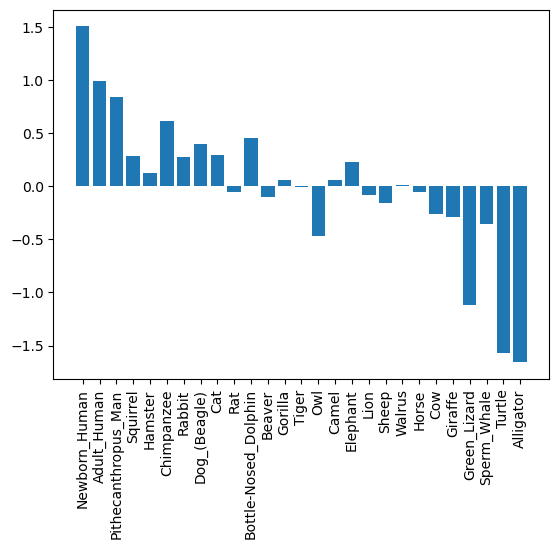

In [11]:
Predicted_Values(brain_body,'Species','body_kg', 'brain_gm', m, b)

From the barplot we can see that most of the values are negative which suggests that the predicted values had been mostly overapproximations. This means our linear regression line had been mostly above the points, to create a more accurate prediction we can try including more data points of large and small brained species. Furthermore, we could also try removing any outliers that might possible skew the data. 